<a href="https://colab.research.google.com/github/prievarag/Slaughter-Chicken-Producer-Price-Predictor/blob/main/ChickenPrice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CHICKEN PRODUCER PRICE PREDICTOR**


---





The problem that we are going to solve here is to predict slaughter chicken producer price. It is well known that the price of the chicken feed is the main driver of the chicken producer price. The price of feed primarily depends on the price of corn, wheat and soy. 

In this dataset, I've collected data from web page of the Hungarian Agricultural Economics Research Institute, within that I used the market price information system (PÁIR). https://www.aki.gov.hu/piaci-arinformacios-rendszer/

In our dataset there are 268 rows and 3 attributes (features) with a target column (price). 


In [ ]:
# Importing the libraries 
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
#importing the dataset
df = pd.read_excel('aki páir adatok.xlsx', sheet_name='All Data')

In [ ]:
# See head of the dataset
df.head()

,Year,Week,Corn,Wheat,Soy,Slaughter Chicken Producer Price
0,2017,1,52867.435,52372.226,105689.600,240.537
1,2017,2,51920.620,52351.644,107704.040,240.527
2,2017,3,52074.662,52305.291,111267.310,241.096
3,2017,4,53048.499,52722.122,110000.880,242.147
4,2017,5,52709.651,52150.271,108778.072,243.513


In [ ]:
#Check the shape (size) of dataframe
df.shape

(268, 6)

In [ ]:
#Learning the dtypes of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268 entries, 0 to 267
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Year                              268 non-null    int64  
 1   Week                              268 non-null    int64  
 2   Corn                              268 non-null    float64
 3   Wheat                             268 non-null    float64
 4   Soy                               261 non-null    float64
 5   Slaughter Chicken Producer Price  267 non-null    float64
dtypes: float64(4), int64(2)
memory usage: 12.7 KB


In [ ]:
#Statistical summary for the dataset
df.describe()

,Year,Week,Corn,Wheat,Soy,Slaughter Chicken Producer Price
count,268.000000,268.000000,268.000000,268.000000,261.000000,267.000000
mean,2019.089552,25.843284,61779.579299,65730.280675,115687.471280,261.766820
std,1.486331,15.283025,13499.256211,14684.799916,22010.281838,20.868472
min,2017.000000,1.000000,45255.099000,46538.873000,83999.106000,240.527000
25%,2018.000000,12.000000,53195.853750,53585.888500,99822.618000,249.891500
50%,2019.000000,26.000000,56508.384500,63007.298500,107717.697000,254.986000
75%,2020.000000,39.000000,68095.722750,72816.193500,134773.112000,262.032500
max,2022.000000,52.000000,100679.229000,112961.221000,178985.775000,358.007000


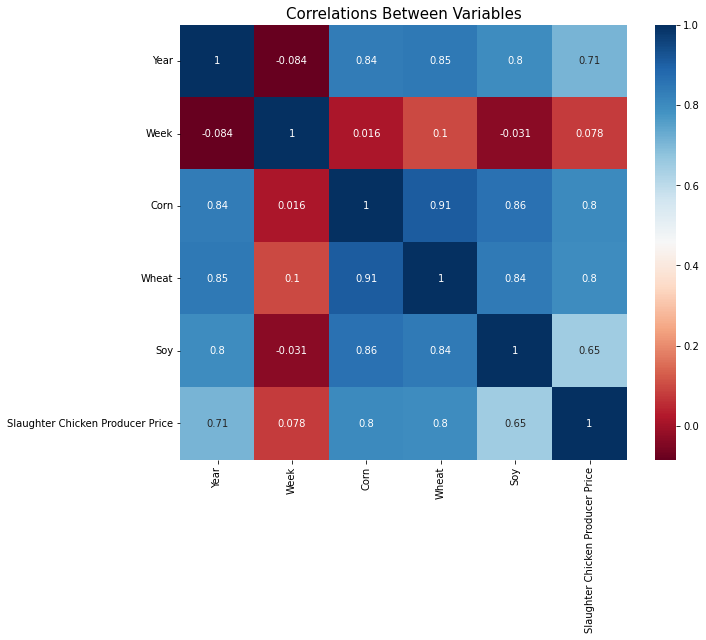

In [ ]:
#Visualizing the correlations between the variables
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), cmap="RdBu", annot=True)
plt.title("Correlations Between Variables", size=15)
plt.show()

As we can see from the map, it is a strong (and equal) correlation between the producer price and price of corn, and producer price and price of wheat. 

In [ ]:
#Checking for missing values
print("Missing Values by Column")
print("-"*30)
print(df.isna().sum())
print("-"*30)
print("TOTAL MISSING VALUES:",df.isna().sum().sum())

Missing Values by Column
------------------------------
Year                                0
Week                                0
Corn                                0
Wheat                               0
Soy                                 7
Slaughter Chicken Producer Price    1
dtype: int64
------------------------------
TOTAL MISSING VALUES: 8


In [ ]:
#Delete the rows containing missing value
df=df.dropna()

In [ ]:
#Checking for missing values again
print("Missing Values by Column")
print("-"*30)
print(df.isna().sum())
print("-"*30)
print("TOTAL MISSING VALUES:",df.isna().sum().sum())

Missing Values by Column
------------------------------
Year                                0
Week                                0
Corn                                0
Wheat                               0
Soy                                 0
Slaughter Chicken Producer Price    0
dtype: int64
------------------------------
TOTAL MISSING VALUES: 0


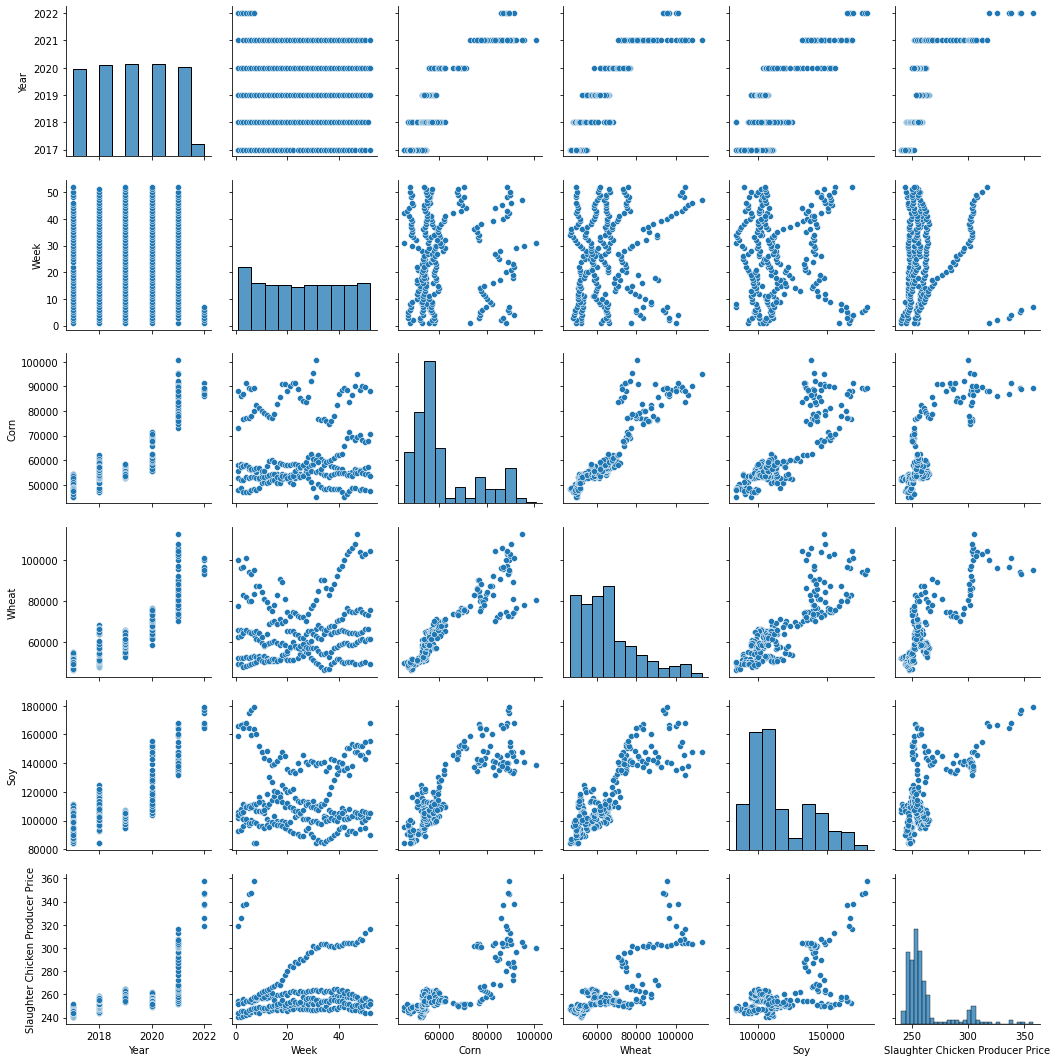

In [ ]:
#pairplot visualization
sns.pairplot(df)

In [ ]:
#Splitting the data into X and y part
X = df.drop('Slaughter Chicken Producer Price', axis=1)
y = df['Slaughter Chicken Producer Price']

In [ ]:
#Standardizing the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
X

array([[-1.42842886, -1.63798907, -0.66123926, -0.91975809, -0.4551091 ],
       [-1.42842886, -1.57151183, -0.73262428, -0.92119531, -0.36341058],
       [-1.42842886, -1.50503458, -0.7210103 , -0.92443208, -0.20120839],
       ...,
       [ 1.98567309, -1.3720801 ,  2.07694098,  2.0097922 ,  2.702308  ],
       [ 1.98567309, -1.30560286,  2.06798957,  1.95600022,  2.7940026 ],
       [ 1.98567309, -1.23912561,  2.1015118 ,  2.08620256,  2.88137675]])

In [ ]:
#Splitting the dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

LINEAR REGRESSION

In [ ]:
# Import library for Linear Regression
from sklearn.linear_model import LinearRegression

# Create a Linear regressor
lm = LinearRegression()

# Train the model using the training sets 
lm.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Value of y intercept
lm.intercept_

261.89372340099817

In [ ]:
# Model prediction on train data
y_pred = lm.predict(X_train)

In [ ]:
# Model Evaluation
print('R2:',metrics.r2_score(y_train, y_pred))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R2: 0.7103452127942838
MAE: 7.614130402157897
MSE: 129.6474194906975
RMSE: 11.386282074966239


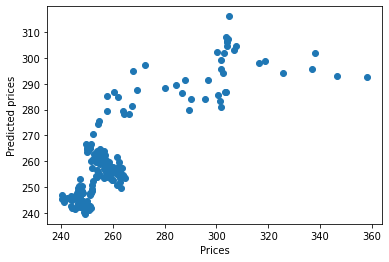

In [ ]:
# Visualizing the differences between actual prices and predicted values
plt.scatter(y_train, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.show()

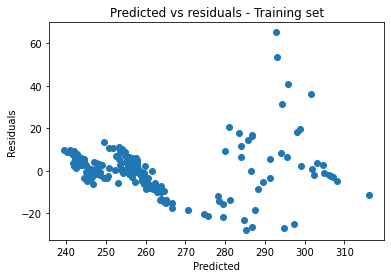

In [ ]:
# Checking residuals
plt.scatter(y_pred,y_train-y_pred)
plt.title("Predicted vs residuals - Training set")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


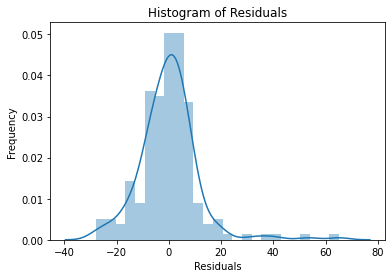

In [ ]:
# Checking Normality of errors
sns.distplot(y_train-y_pred)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

In [ ]:
# Predicting Test data with the model
y_test_pred = lm.predict(X_test)

In [ ]:
# Model Evaluation
acc_linreg = metrics.r2_score(y_test, y_test_pred)
print('R^2:', acc_linreg)
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

R^2: 0.5965636614953937
MAE: 8.188693886790855
MSE: 143.70282495643337
RMSE: 11.987611311534645


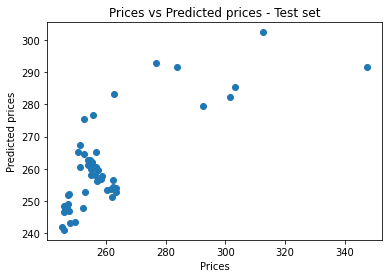

In [ ]:
# Visualizing the differences between test prices and predicted values
plt.scatter(y_test, y_test_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices - Test set")
plt.show()

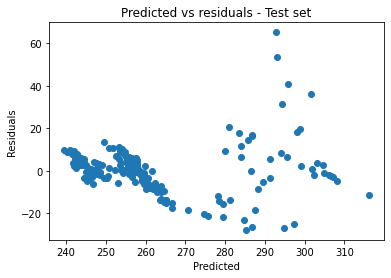

In [ ]:
# Checking residuals
plt.scatter(y_pred,y_train-y_pred)
plt.title("Predicted vs residuals - Test set")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

In [ ]:
lm.predict(scaler.transform([[2022, 9, 150000, 120000, 90000]]))

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


array([389.75792192])

RANDOM FOREST REGRESSOR

In [ ]:
#importing the library
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()

rf.fit(X_train, y_train)

RandomForestRegressor()

In [ ]:
#Model prediction
y_pred = rf.predict(X_train)

In [ ]:
#Model evaluation
print('R2:',metrics.r2_score(y_train, y_pred))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R2: 0.9925340554341747
MAE: 0.8405253365384368
MSE: 3.3417036064119827
RMSE: 1.8280327148090054


In [ ]:
#Predicting test data with the model
y_test_pred = rf.predict(X_test)

In [ ]:
# Model Evaluation
acc_rf = metrics.r2_score(y_test, y_test_pred)
print('R^2:', acc_linreg)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_test_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

R^2: 0.5965636614953937
Adjusted R^2: 0.9778731139651913
MAE: 1.9081781132075462
MSE: 7.123691530596204
RMSE: 2.669024452978317


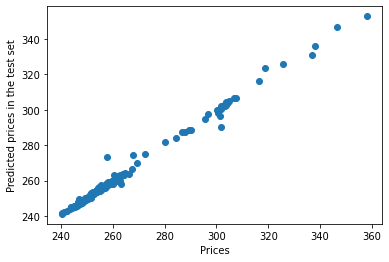

In [ ]:
# Visualizing the differences between actual prices and predicted values
plt.scatter(y_train, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices in the test set")
plt.show()

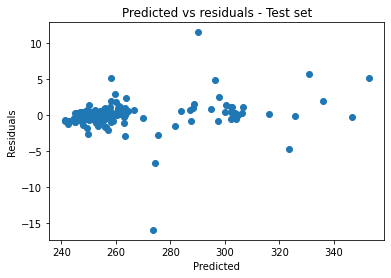

In [ ]:
# Checking residuals Random Forest Regressor
plt.scatter(y_pred,y_train-y_pred)
plt.title("Predicted vs residuals - Test set")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

In [ ]:
rf.predict(scaler.transform([[2022, 9, 91000, 101000, 168000]]))

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


array([336.61895])

XGBoost Regressor

In [ ]:
#Importing XGBoost Regressor
from xgboost import XGBRegressor

#Creating an XGBoost regressor
xgbreg = XGBRegressor()

#Training the model using the training set
xgbreg.fit(X_train, y_train)

[13:27:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [ ]:
#Model prediction
y_pred = xgbreg.predict(X_train)

In [ ]:
#Model evaluation
print('R2:',metrics.r2_score(y_train, y_pred))
print('Adjusted R2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R2: 0.9914274293045389
Adjusted R2: 0.9912152369605918
MAE: 1.3632535470815808
MSE: 3.837021579342237
RMSE: 1.95883168734382


In [ ]:
#Predicting test data with the test set
y_test_pred = xgbreg.predict(X_test)

In [ ]:
#Model Evaluation
acc_xgb = metrics.r2_score(y_test, y_test_pred)
print('R^2:', acc_linreg)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_test_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

R^2: 0.5965636614953937
Adjusted R^2: 0.9488017483017454
MAE: 2.345874486383402
MSE: 16.483139626173866
RMSE: 4.059943303320117


<function matplotlib.pyplot.show>

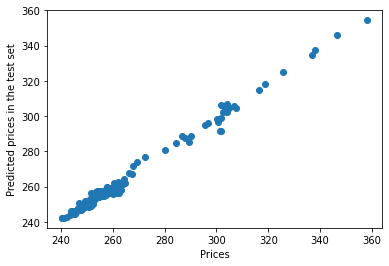

In [ ]:
# Visualizing the differences between actual prices and predicted values
plt.scatter(y_train, y_pred)
plt.xlabel('Prices')
plt.ylabel('Predicted prices in the test set')
plt.show

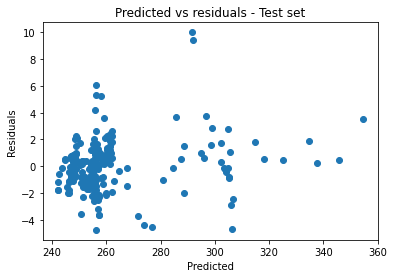

In [ ]:
# Checking residuals
plt.scatter(y_pred,y_train-y_pred)
plt.title("Predicted vs residuals - Test set")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

In [ ]:
#predicting based on futures data
xgbreg.predict(scaler.transform([[2022, 9, 91000, 101000, 168000]]))

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


array([348.77856], dtype=float32)

In [ ]:
models = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest', 'XGBoost'],
    'R-squared Score': [acc_linreg*100, acc_rf*100, acc_xgb*100]})
models.sort_values(by='R-squared Score', ascending=False)

,Model,R-squared Score
1,Random Forest,98.000070
2,XGBoost,95.372466
0,Linear Regression,59.656366
